In [ ]:
##STEP 1 : LOAD Library

In [95]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



In [191]:
# Step 2: Import file
mydata2 = pd.read_excel('MMM_Blender_data_2.xlsx')

# adjust date format
mydata2["Date_adjust"] =pd.to_datetime(mydata2["Date"], format="%b-%Y")

In [192]:
mydata2

,Date,Sales ($),TV_ads ($),online_ads ($),Print_ads ($),Price ($),Date_adjust
0,Jan-2008,6237000,181222.548442,12152.540107,24986.912760,135.0,2008-01-01
1,Feb-2008,6115500,179104.353164,57353.376363,17574.385360,135.0,2008-02-01
2,Mar-2008,10577250,222756.223235,146794.245435,16016.022899,135.0,2008-03-01
3,Apr-2008,13473000,188266.818315,376459.468169,29689.694160,135.0,2008-04-01
4,May-2008,6258525,210038.289741,21297.573231,17606.991440,136.5,2008-05-01
...,...,...,...,...,...,...,...
145,Feb-2020,9486000,188038.562233,314738.939174,20633.865171,180.0,2020-02-01
146,Mar-2020,4230000,193748.973119,61583.121445,17514.258530,180.0,2020-03-01
147,Apr-2020,9504000,199048.223805,324562.541889,16122.631683,180.0,2020-04-01
148,May-2020,3861000,192013.052245,79169.843365,19993.295700,180.0,2020-05-01


In [224]:
print(X.describe())

        Price ($)     TV_ads ($)  online_ads ($)  Print_ads ($)
count  150.000000     150.000000      150.000000     150.000000
mean   158.150000  200172.675917   123295.713622   19780.483463
std     13.732799    9486.447152    88241.498625    4875.143064
min    135.000000  176450.216326      876.373521    4716.529170
25%    145.875000  193755.149356    54933.854835   16695.656714
50%    158.250000  199504.100334   104538.370602   19926.875169
75%    169.500000  206391.579637   172074.250144   22933.492770
max    180.000000  222756.223235   442144.852073   32794.574130


In [228]:
np.mean(mydata2["Sales ($)"])

7387596.0

In [194]:
# step 3 : Define X,y
X=mydata2[["Price ($)","TV_ads ($)","online_ads ($)","Print_ads ($)"]]
y=mydata2[["Sales ($)"]]


# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Check the expanded features
print("Polynomial Features:\n", poly.get_feature_names_out())

Polynomial Features:
 ['Price ($)' 'TV_ads ($)' 'online_ads ($)' 'Print_ads ($)' 'Price ($)^2'
 'Price ($) TV_ads ($)' 'Price ($) online_ads ($)'
 'Price ($) Print_ads ($)' 'TV_ads ($)^2' 'TV_ads ($) online_ads ($)'
 'TV_ads ($) Print_ads ($)' 'online_ads ($)^2'
 'online_ads ($) Print_ads ($)' 'Print_ads ($)^2']


In [195]:
# Scale features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)


In [196]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=42)

# # Initialize and fit Ridge Regression
# ridge = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
# ridge.fit(X_train, y_train)

# # Predict on the test set
# y_pred = ridge.predict(X_test)


# # Evaluate
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse:.2f}")
# print(f"R-squared: {r2:.2f}")


Mean Squared Error: 376933548982.11
R-squared: 0.95


In [197]:
# step 5: find the optimzie alpha from ridge model to regularization 
from sklearn.model_selection import GridSearchCV
 
# Define a range of alpha values
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Grid search with cross-validation
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best alpha and best model
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alpha}")
best_model = grid_search.best_estimator_


# Predict with the best model
y_pred_best = best_model.predict(X_test)

# Final evaluation
final_mse = mean_squared_error(y_test, y_pred_best)
final_r2 = r2_score(y_test, y_pred_best)

print(f"Final Mean Squared Error: {final_mse:.2f}")
print(f"Final R-squared: {final_r2:.2f}")

Best Alpha: 0.1
Final Mean Squared Error: 305605937215.01
Final R-squared: 0.96


In [211]:

# Generate Ridge model with polynomical =2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Fit Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_poly_scaled, y)



Ridge()

In [216]:
feature_names

array(['Price ($)', 'TV_ads ($)', 'online_ads ($)', 'Print_ads ($)',
       'Price ($)^2', 'Price ($) TV_ads ($)', 'Price ($) online_ads ($)',
       'Price ($) Print_ads ($)', 'TV_ads ($)^2',
       'TV_ads ($) online_ads ($)', 'TV_ads ($) Print_ads ($)',
       'online_ads ($)^2', 'online_ads ($) Print_ads ($)',
       'Print_ads ($)^2'], dtype=object)

In [218]:
import pandas as pd

# Example coefficients (as NumPy array)
coefficients = ridge.coef_  # Replace this with your model's coefficients
feature_names = poly.get_feature_names_out()  # Get feature names
coefficients = ridge.coef_.flatten()

# Create a DataFrame for coefficients
coefficients_df = pd.DataFrame({
    "Feature":feature_names ,
    "Coefficient": coefficients
   #  "Absolute Importance": np.abs(coefficients)
})
# Sort coefficients by their absolute values or values
coefficients_sorted = coefficients_df.sort_values(by="Coefficient", ascending=False)

# Display sorted coefficients
print(coefficients_sorted)



# . Interpretation of Results
# the target (Sales) is primarily influenced by Price, with less contribution from ad channels

#Ridge Regularization Shrinks Other Coefficients: 
# Ridge reduces the magnitude of coefficients for features with low explanatory power, leaving dominant predictors unaffected (or less affected).

                         Feature   Coefficient
6       Price ($) online_ads ($)  1.889023e+06
9      TV_ads ($) online_ads ($)  7.757079e+05
2                 online_ads ($)  6.734126e+05
7        Price ($) Print_ads ($)  6.154788e+05
5           Price ($) TV_ads ($)  2.955337e+05
1                     TV_ads ($)  2.248107e+05
12  online_ads ($) Print_ads ($)  1.772477e+05
8                   TV_ads ($)^2  1.397901e+05
3                  Print_ads ($)  6.804439e+04
10      TV_ads ($) Print_ads ($)  3.448863e+04
13               Print_ads ($)^2 -3.020099e+05
0                      Price ($) -5.266760e+05
4                    Price ($)^2 -1.160880e+06
11              online_ads ($)^2 -1.314044e+06


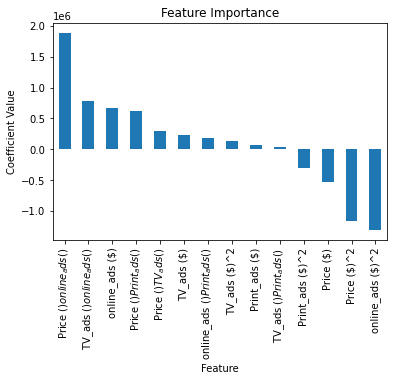

In [219]:
import matplotlib.pyplot as plt

coefficients_sorted.plot(
    kind="bar", x="Feature", y="Coefficient", legend=False, title="Feature Importance"
)
plt.ylabel("Coefficient Value")
plt.show()



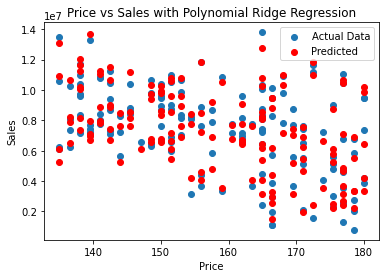

In [221]:
import matplotlib.pyplot as plt

plt.scatter(X["Price ($)"], y, label="Actual Data")
plt.scatter(X["Price ($)"], ridge.predict(X_poly_scaled), color="red", label="Predicted")
plt.xlabel("Price")
plt.ylabel("Sales")
plt.legend()
plt.title("Price vs Sales with Polynomial Ridge Regression")
plt.show()


In [229]:
coefficients_df

,Feature,Coefficient
0,Price ($),-5.266760e+05
1,TV_ads ($),2.248107e+05
2,online_ads ($),6.734126e+05
3,Print_ads ($),6.804439e+04
4,Price ($)^2,-1.160880e+06
5,Price ($) TV_ads ($),2.955337e+05
6,Price ($) online_ads ($),1.889023e+06
7,Price ($) Print_ads ($),6.154788e+05
8,TV_ads ($)^2,1.397901e+05
9,TV_ads ($) online_ads ($),7.757079e+05


In [ ]:
import pandas as pd

# Coefficients from Ridge model
coefficients_df


# Mean values
means = {"Price": 10, "Channel1": 200, "Channel2": 150, "Sales": 500}

# Calculate ROI and Elasticity for each channel
results = []
for feature in ["Channel1", "Channel2"]:
    interaction_term = f"Price_{feature}"
    direct_effect = coefficients[feature]
    interaction_effect = coefficients.get(interaction_term, 0) * means["Price"]

    # Total effect
    total_effect = direct_effect + interaction_effect

    # ROI (Assume cost per unit spend = 1.5)
    cost = 1.5
    roi = total_effect / cost

    # Elasticity
    elasticity = (total_effect * means[feature]) / means["Sales"]

    results.append({"Feature": feature, "ROI": roi, "Elasticity": elasticity})

# Display results
results_df = pd.DataFrame(results)
print(results_df)
